In [11]:

import numpy as np
import pandas as pd 
from sklearn.preprocessing import minmax_scale
from sklearn.multioutput import RegressorChain
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale




In [2]:
def mean_euclidean_error(y_true, y_pred):
    """
    mean euclidean error MEE
    """

    error = 0
    if len(y_true) == len(y_pred):
        for i in range(len(y_true)):
            error = error + np.sqrt(np.square(y_pred[i][0]
                                    - y_true[i][0])
                                    + np.square(y_pred[i][1]
                                    - y_true[i][1]))
        return error / len(y_true)

In [19]:

train_df = pd.read_csv('../data/ML-CUP20-TR .csv')
test_df = pd.read_csv('../data/ML-CUP20-TS.csv')

# Spilitting the targets and input features



In [29]:
"""Normalize"""
train_df=pd.DataFrame(minmax_scale(train_df, feature_range=(0,1), axis=0))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.224739,0.606110,0.513135,0.405271,0.431924,0.788007,0.211400,0.884572,0.808857,0.196114,0.617469,0.131906
1,0.244425,0.535370,0.865846,0.227391,0.327178,0.478917,0.202542,0.567086,0.755055,0.304924,0.933293,0.387680
2,0.289817,0.707784,0.642030,0.425700,0.354479,0.506522,0.151235,0.573329,0.636383,0.199162,0.804697,0.272030
3,0.266704,0.738000,0.613185,0.468758,0.441480,0.612233,0.382764,1.000000,0.755745,0.369156,0.599288,0.117866
4,0.602166,0.491626,0.349885,0.795672,0.640416,0.498892,0.486423,0.434361,0.330936,0.797920,0.328226,0.161409
...,...,...,...,...,...,...,...,...,...,...,...,...
1519,0.702181,0.002443,0.159390,0.552831,0.658430,0.467748,0.595956,0.211874,0.275020,0.543404,0.055550,0.908283
1520,0.730183,0.141362,0.325332,0.457191,0.594556,0.559077,0.700277,0.300096,0.168239,0.892304,0.170576,0.477042
1521,0.292412,0.478587,0.636050,0.311516,0.206025,0.490957,0.148642,0.548428,0.747787,0.208444,0.887416,0.348156
1522,0.255359,0.838206,0.511189,0.220658,0.258208,0.523692,0.299930,0.849455,0.715572,0.318957,0.699541,0.184199


In [30]:


# Spilitting the targets and input features
train_x = train_df.iloc[:,:-2].to_numpy()
train_y = train_df.iloc[:,[10,11]].to_numpy()


In [33]:
"""split train dataset"""

(x_train, x_test, y_train, y_test) = train_test_split(train_x, train_y,
        test_size=0.6, random_state=30)

In [34]:
"""regression models """

knn_model = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                     with_std=True)), ('estimator',
                     RegressorChain(KNeighborsRegressor(n_neighbors=4),
                     order=[0, 1]))])
et_regressor = Pipeline(steps=[('scale', StandardScaler()), ('estimator'
                        ,
                        RegressorChain(ExtraTreeRegressor(random_state=0),
                        order=[0, 1]))])
dt_regressor = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                        with_std=True)), ('estimator',
                        RegressorChain(DecisionTreeRegressor(random_state=0),
                        order=[0, 1]))])
direct_svr = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                      with_std=True)), ('estimator',
                      MultiOutputRegressor(SVR(kernel='rbf', C=0.1,
                      gamma='scale', epsilon=0.1)))])
chin_svr = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                    with_std=True)), ('estimator',
                    RegressorChain(SVR(kernel='rbf', C=0.1,
                    gamma='scale', epsilon=0.1)))])


In [35]:
"""parametres of models for gridsearch """

knn_params = {
    'estimator__base_estimator__n_neighbors': [
        5,
        6,
        7,
        8,
        9,
        10,
        ],
    'estimator__base_estimator__leaf_size': [1, 2, 3, 5],
    'estimator__base_estimator__weights': ['uniform', 'distance'],
    'estimator__base_estimator__algorithm': ['auto', 'ball_tree',
            'kd_tree', 'brute'],
    }

er_params = {
    'estimator__base_estimator__criterion': ['mse', 'mae', 'poisson',
            'friedman_mse'],
    'estimator__base_estimator__min_samples_split': [10, 20, 40, 'best'
            ],
    'estimator__base_estimator__max_depth': [2, 6, 8],
    'estimator__base_estimator__min_samples_leaf': [20, 40, 100],
    'estimator__base_estimator__max_leaf_nodes': [5, 20, 100],
    }

dt_params = {
    'estimator__base_estimator__criterion': ['mse', 'mae', 'poisson',
            'friedman_mse'],
    'estimator__base_estimator__min_samples_split': [10, 20, 40, 'best'
            ],
    'estimator__base_estimator__max_depth': [2, 6, 8],
    'estimator__base_estimator__min_samples_leaf': [20, 40, 100],
    'estimator__base_estimator__max_leaf_nodes': [5, 20, 100],
    }

dsvr_params = {
    'estimator__estimator__kernel': ['rbf', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'estimator__estimator__C': np.logspace(-3, 2, 6).tolist(),
    'estimator__estimator__gamma': [0.0001, 0.001, 0.01, 0.1],
    'estimator__estimator__epsilon': np.logspace(-3, 2, 6).tolist(),
    }
chinesvr_params = {
    'estimator__base_estimator__kernel': ['rbf', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    'estimator__base_estimator__gamma': [0.0001, 0.001, 0.01, 0.1],
    'estimator__base_estimator__C': np.logspace(-3, 2, 6, 8).tolist(),
    'estimator__base_estimator__epsilon': np.logspace(-3, 2, 6,
            8).tolist(),
    }


In [36]:
""" list of regression_models, parameters_list and models name  """

regression_models = [knn_model, et_regressor, dt_regressor, direct_svr,
                     chin_svr]
parameters_list = [knn_params, er_params, dt_params, dsvr_params,
                   chinesvr_params]
model_log = ['KNeighborsRegressor', 'ExtraTreeRegressor',
             'DecisionTreeRegressor', 'MultiOutputRegressor',
             'RegressorChain']

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:    8.2s finished


Best parameters:{'estimator__base_estimator__algorithm': 'auto', 'estimator__base_estimator__leaf_size': 1, 'estimator__base_estimator__n_neighbors': 9, 'estimator__base_estimator__weights': 'distance'}
Best training accuracy:-0.004865519803947337
Test dataset accuracy score for best params:0.9412514066395523
Mean_euclidean_error for test dataset :0.06869701726449914
Best model :Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RegressorChain(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                   leaf_size=1,
                                                                   metric='minkowski',
                                                                   metric_params=None,
                                                                   n_jobs=None,
                                             

/home/anelay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


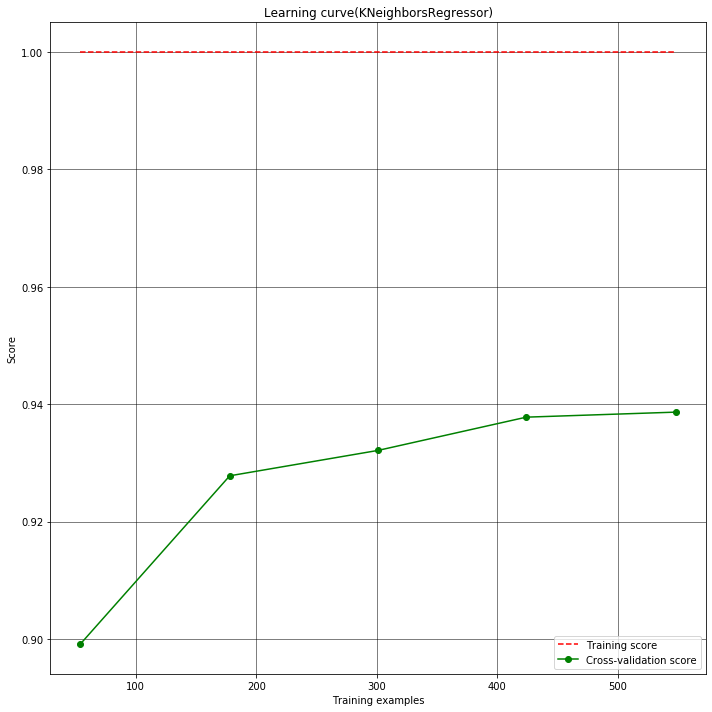

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 3640 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   11.1s finished


Best parameters:{'estimator__base_estimator__criterion': 'mse', 'estimator__base_estimator__max_depth': 6, 'estimator__base_estimator__max_leaf_nodes': 20, 'estimator__base_estimator__min_samples_leaf': 20, 'estimator__base_estimator__min_samples_split': 10}
Best training accuracy:-0.01546768794656114
Test dataset accuracy score for best params:0.8018553282586434
Mean_euclidean_error for test dataset :0.13165311703243265
Best model :Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RegressorChain(base_estimator=ExtraTreeRegressor(ccp_alpha=0.0,
                                                                  criterion='mse',
                                                                  max_depth=6,
                                                                  max_features='auto',
                                                                  max_leaf_node

/home/anelay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


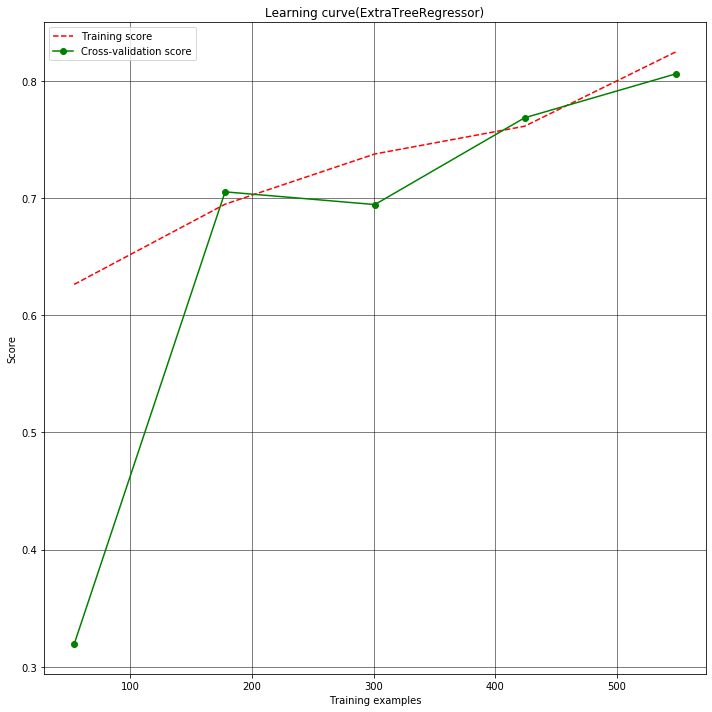

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 3568 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   13.9s finished


Best parameters:{'estimator__base_estimator__criterion': 'mse', 'estimator__base_estimator__max_depth': 8, 'estimator__base_estimator__max_leaf_nodes': 20, 'estimator__base_estimator__min_samples_leaf': 20, 'estimator__base_estimator__min_samples_split': 10}
Best training accuracy:-0.01093737494250283
Test dataset accuracy score for best params:0.8415266525042723
Mean_euclidean_error for test dataset :0.1091685975466941
Best model :Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RegressorChain(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                     criterion='mse',
                                                                     max_depth=8,
                                                                     max_features=None,
                                                                     m

/home/anelay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


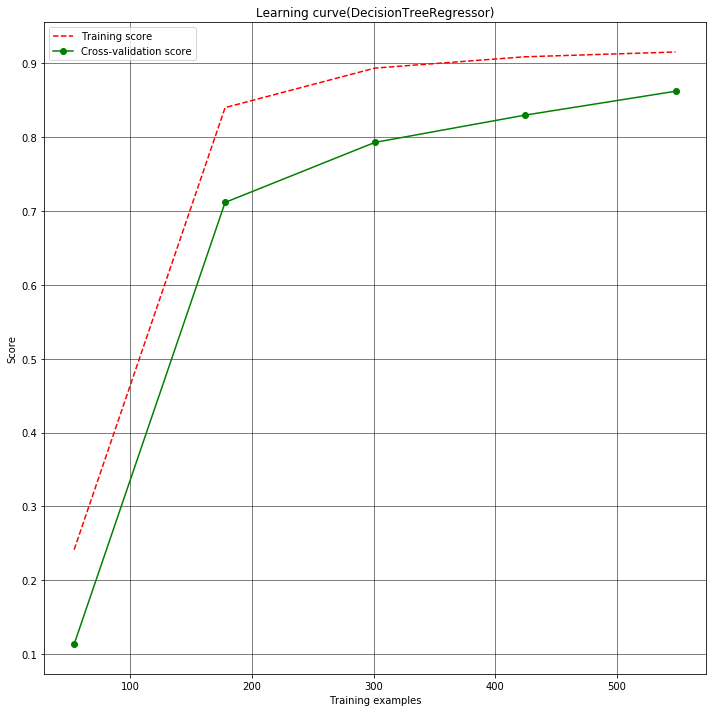

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1376 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 5444 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 6570 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 7185 out of 7200 | elapsed:  1.5min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  2.6min finished


Best parameters:{'estimator__estimator__C': 0.1, 'estimator__estimator__epsilon': 0.001, 'estimator__estimator__gamma': 0.1, 'estimator__estimator__kernel': 'rbf'}
Best training accuracy:-0.004896663503462742
Test dataset accuracy score for best params:0.9410725973377316
Mean_euclidean_error for test dataset :0.07209989888140696
Best model :Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 MultiOutputRegressor(estimator=SVR(C=0.1, cache_size=200,
                                                    coef0=0.0, degree=3,
                                                    epsilon=0.001, gamma=0.1,
                                                    kernel='rbf', max_iter=-1,
                                                    shrinking=True, tol=0.001,
                                                    verbose=False),
                                      n_jobs=None))

/home/anelay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


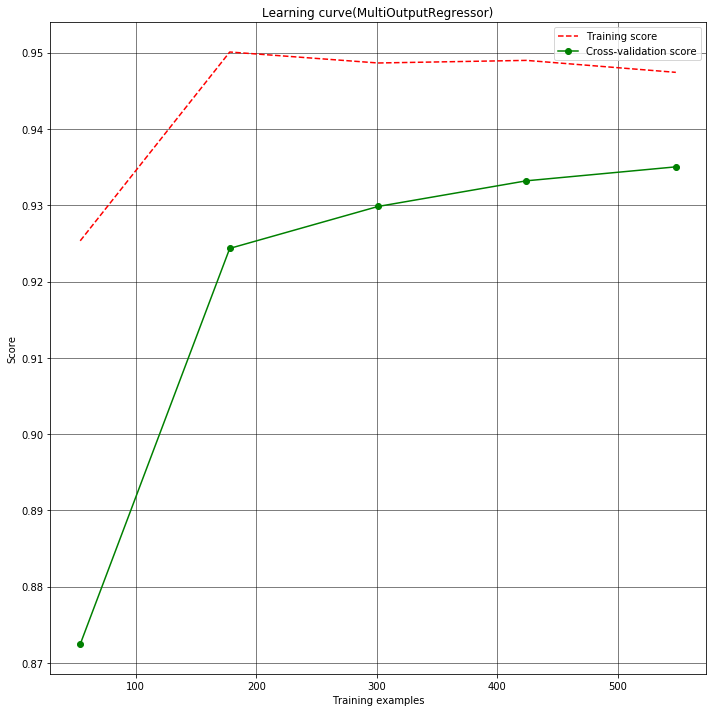

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1840 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 5340 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 6573 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  3.1min finished


Best parameters:{'estimator__base_estimator__C': 0.1, 'estimator__base_estimator__epsilon': 0.01, 'estimator__base_estimator__gamma': 0.1, 'estimator__base_estimator__kernel': 'rbf'}
Best training accuracy:-0.004902687446581839
Test dataset accuracy score for best params:0.9413612256364262
Mean_euclidean_error for test dataset :0.07186754013412938
Best model :Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RegressorChain(base_estimator=SVR(C=0.1, cache_size=200,
                                                   coef0=0.0, degree=3,
                                                   epsilon=0.01, gamma=0.1,
                                                   kernel='rbf', max_iter=-1,
                                                   shrinking=True, tol=0.001,
                                                   verbose=False),
                                cv=None

/home/anelay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


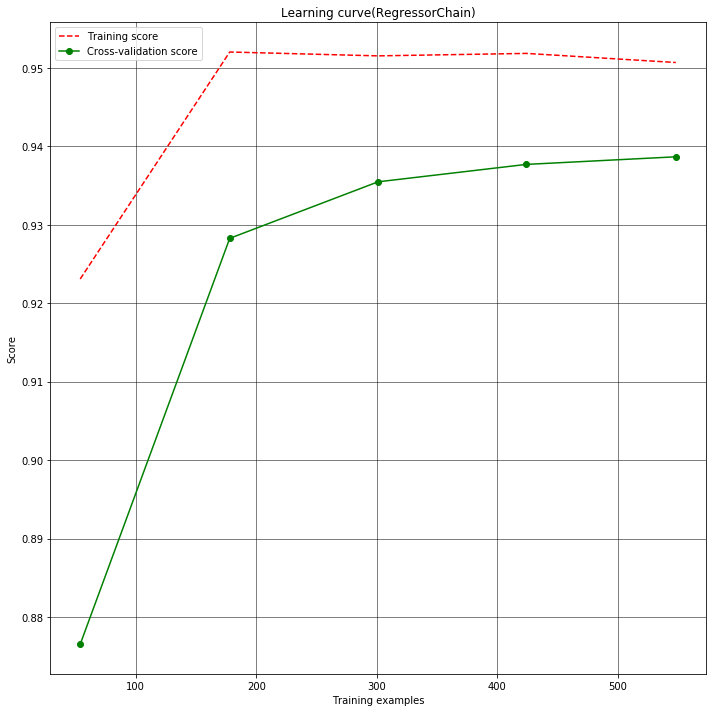

In [37]:

""" Gridsearch and Learning curve"""

for i in range(len(regression_models)):
    Grid = GridSearchCV(
        estimator=regression_models[i],
        param_grid=parameters_list[i],
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        cv=10,
        verbose=3,
        ).fit(x_train, y_train)
    y_pred = Grid.predict(x_test)
    df_result = pd.DataFrame(Grid.cv_results_)
    (train_sizes, train_scores, test_scores) = \
        learning_curve(Grid.best_estimator_, x_train, y_train, cv=10,
                       n_jobs=5)

    print(f"Best parameters:{Grid.best_params_}")
    print(f"Best training accuracy:{Grid.best_score_}")
    print(f"Test dataset accuracy score for best params:{r2_score(y_test, y_pred)}" )
    print(f"Mean_euclidean_error for test dataset :{mean_euclidean_error(y_test, y_pred)}" )
    print(f"Best model :{Grid.best_estimator_}")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    (fig, ax) = plt.subplots(1, figsize=(10, 10))
    ax.grid(linestyle='-', linewidth='0.5', color='black')
    ax.set_axisbelow(True)
    plt.plot(train_sizes, train_scores_mean, '--', color='r',
             label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
             label='Cross-validation score')
    plt.title(f"Learning curve({model_log[i]})")
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='Best')
    plt.tight_layout()
    plt.show()



In [9]:
RegressorChain(SVR()).get_params()
MultiOutputRegressor(SVR()).get_params()

{'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'n_jobs': None}